# Decision trees in Python

## Code example #1

## Tree Visulisation 

In [22]:
def tree_visulisation(treeclf):
    from sklearn import tree
    import graphviz 
    from IPython.display import Image
    dot_data = tree.export_graphviz(treeclf, out_file=None) 
    tree_img =graphviz.Source(dot_data) 
    

    tree_img.view()
    #tree_img.view('tree')

## Decision tree model

In [24]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
titanic_df = pd.read_csv("Titanic_cleaned_data.csv")
titanic_df.head()
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic_df[feature_cols]
y = titanic_df.Survived
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
# fit a classification tree with max_depth=5
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
print(Xtrain.shape)
# Fit our training data
treeclf.fit(Xtrain, ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))
tree_visulisation(treeclf)


(623, 5)
Training accuracy: 0.8523274478330658
Testing accuracy : 0.7723880597014925


[Text(2450.6756756756754, 2491.5, 'X[1] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(1281.8918918918919, 2038.5, 'X[0] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(603.2432432432432, 1585.5, 'X[2] <= 2.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(301.6216216216216, 1132.5, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(150.8108108108108, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(452.4324324324324, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(904.8648648648648, 1132.5, 'X[2] <= 24.5\ngini = 0.054\nsamples = 108\nvalue = [3, 105]'),
 Text(754.0540540540541, 679.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(1055.6756756756756, 679.5, 'X[2] <= 26.0\ngini = 0.078\nsamples = 74\nvalue = [3, 71]'),
 Text(904.8648648648648, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1206.4864864864865, 226.5, 'gini = 0.053\nsamples = 73\nvalue = [2, 71]'),
 Text(1960.5405405405404, 1585.5, 'X[4]

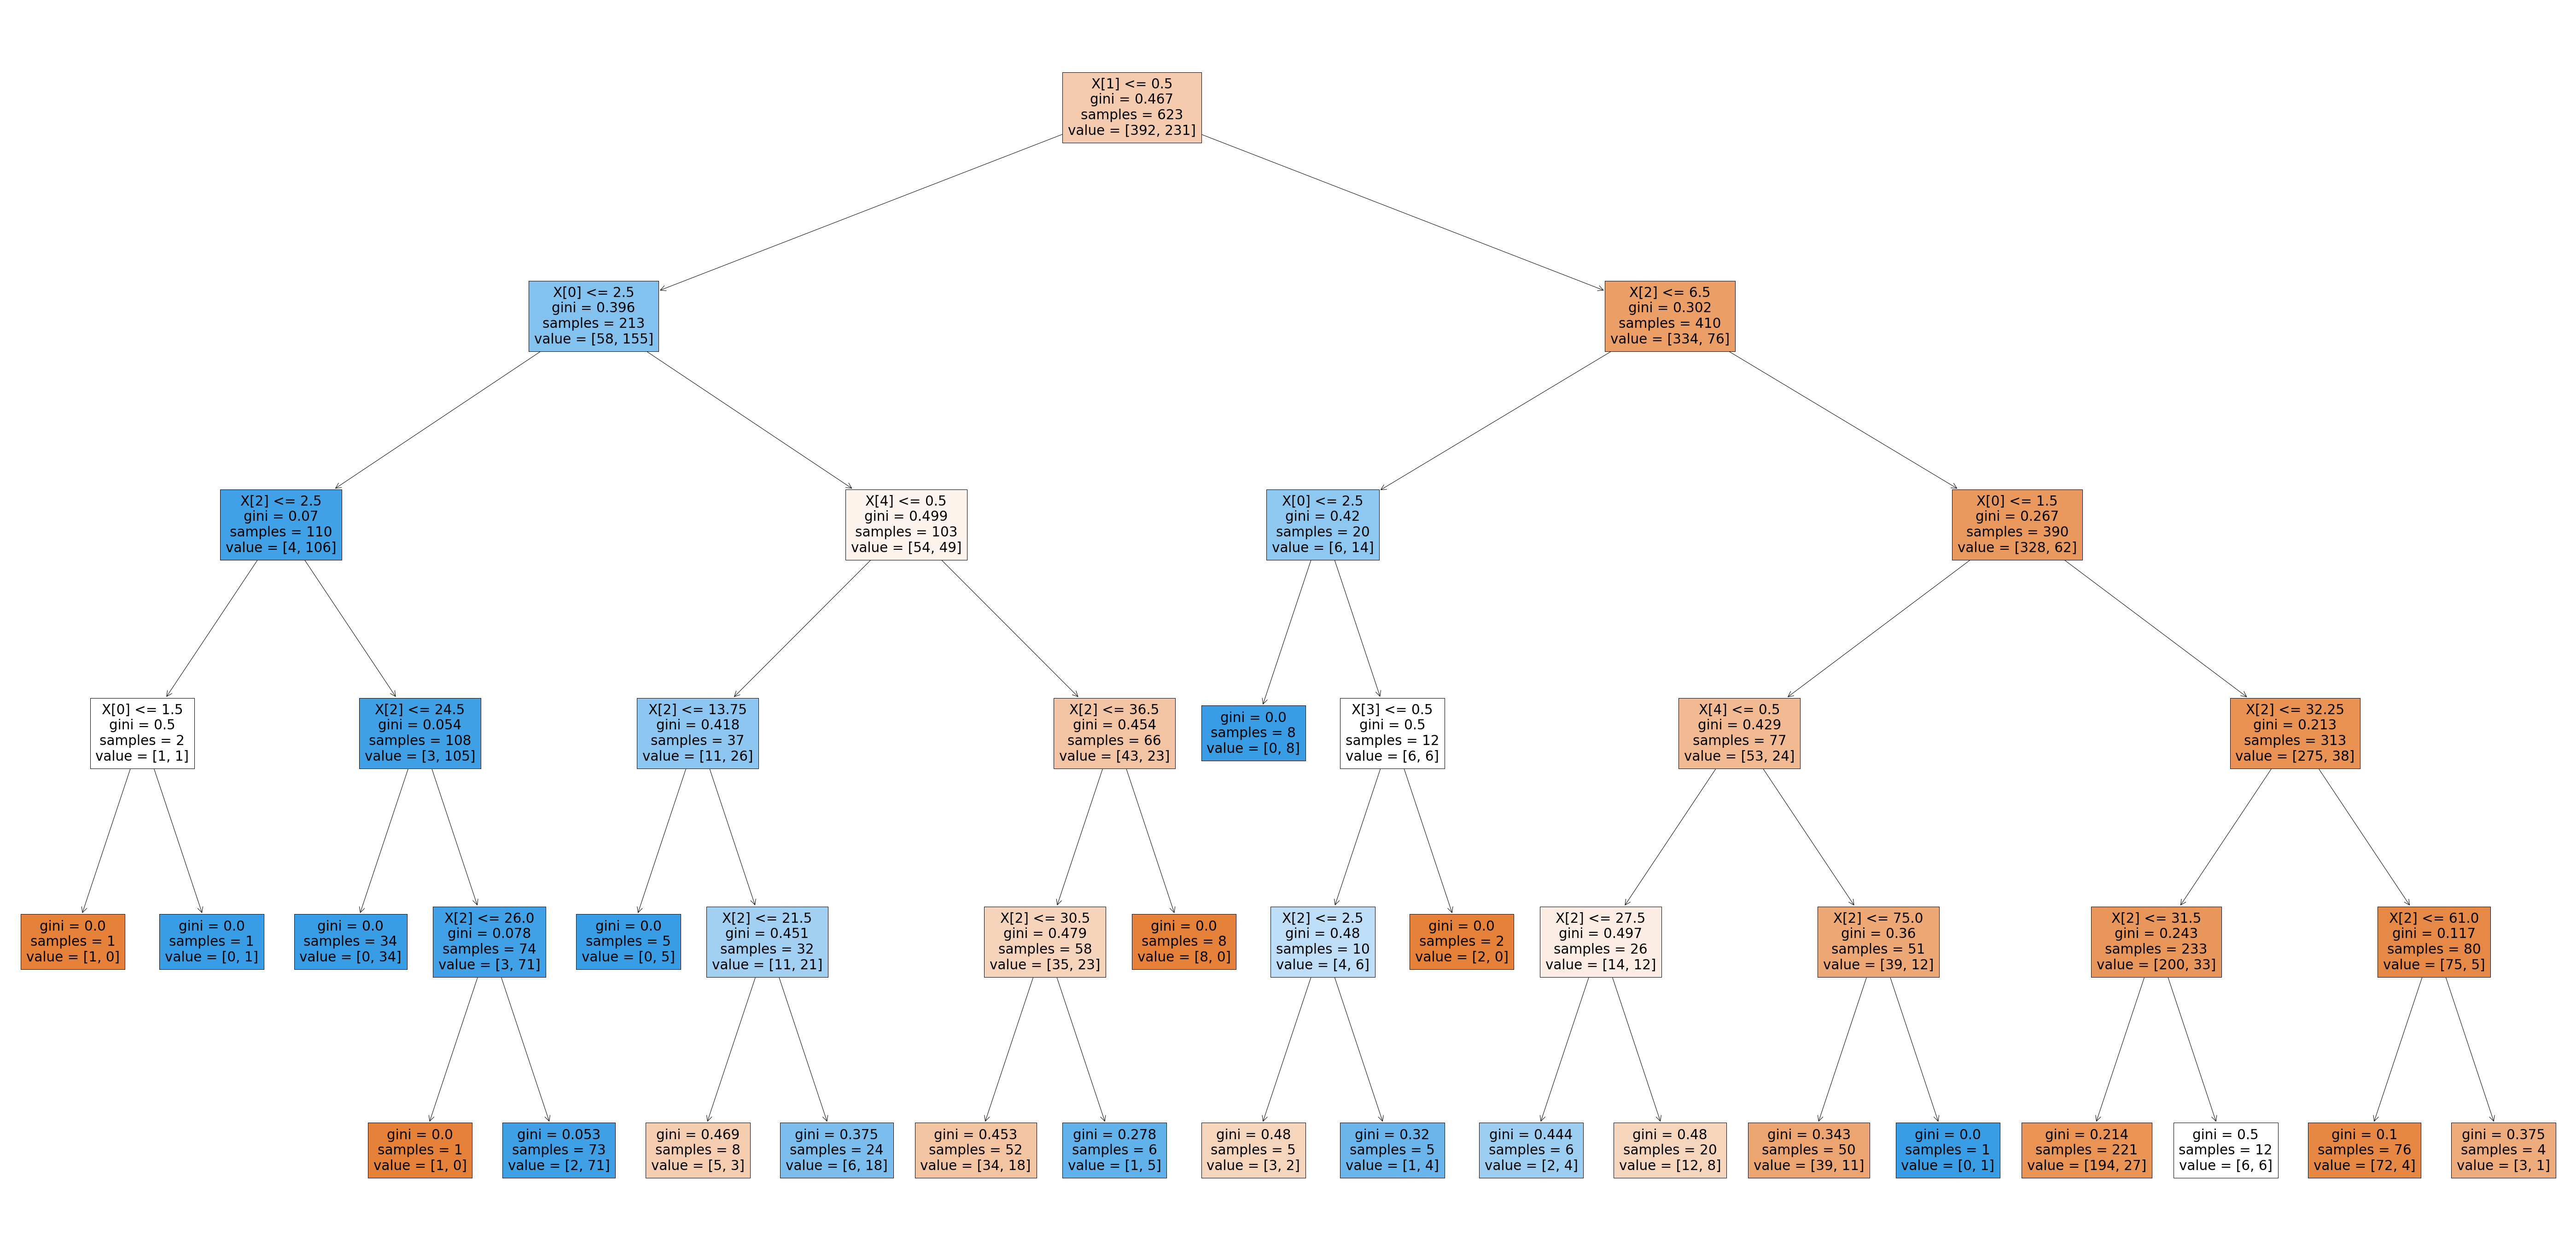

In [25]:
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(treeclf,filled=True)

## Cross validation

In [ ]:
# use crossvalidation to get avg accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

## Validation Curve

In [26]:
from sklearn.model_selection import validation_curve

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(10, 10)


## Tree depth vs Model accuracy

In [ ]:
# Mean accuracy score for each value of max-depth
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

# Best max depth

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(Xtrain,ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

# Post pruning decision trees with cost complexity pruning

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13235809539273619


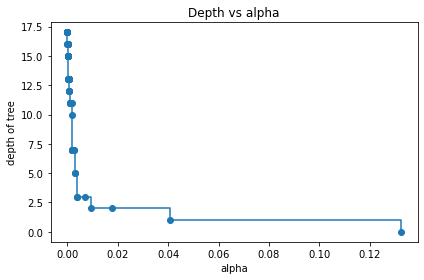

In [44]:

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(Xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Several model for diffrent aplpha values.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

depth = [clf.tree_.max_depth for clf in clfs]

plt.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.title("Depth vs alpha")
plt.tight_layout()

# Aplpha vs training and testing accuracy

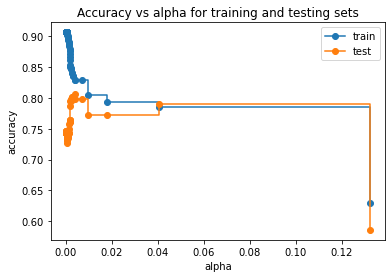

In [46]:
train_scores = [clf.score(Xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(Xtest, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# new model with best alpha value

In [50]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.04)
clf.fit(Xtrain,ytrain)
pred=clf.predict(Xtest)
accuracy_score(ytest, pred)

0.7723880597014925

# Visulisation of pruning tree

[Text(502.20000000000005, 453.0, 'X[1] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(334.8, 271.8, 'X[0] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(167.4, 90.59999999999997, 'gini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 Text(669.6, 271.8, 'gini = 0.302\nsamples = 410\nvalue = [334, 76]')]

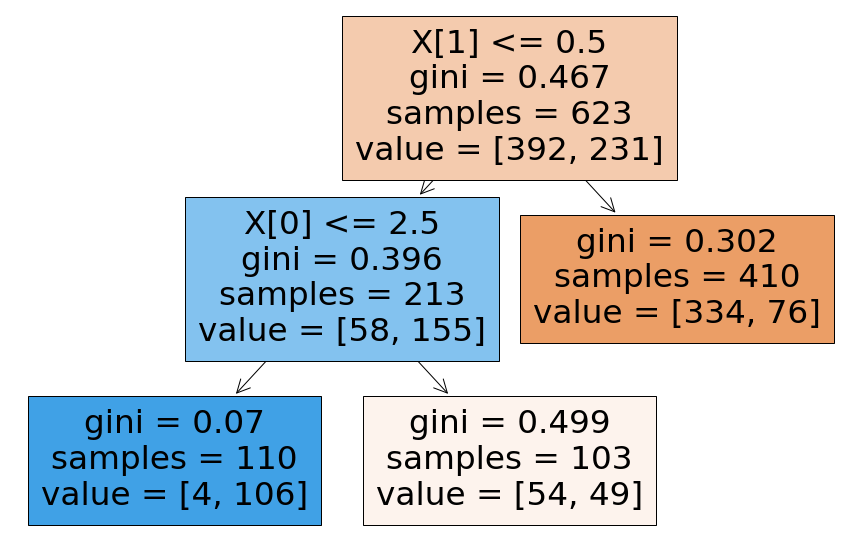

In [51]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

# Random Forest in Python

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42)
rfclf.fit(Xtrain,ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, rfclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, rfclf.predict(Xtest))))

## Feature Ranking

In [ ]:
print(rfclf.feature_importances_)
print(feature_cols)
n = len(feature_cols)
plt.bar(range(0,n),rfclf.feature_importances_)

plt.xticks(range(0,n), feature_cols, rotation=45) # put the feature names in x-axis
plt.xlim([-1, n]) # reset the x-limits for readability
plt.ylabel("Feature Importance")
plt.show()